# Experiments

In this notebook we perform different ways to encode the concepts' features based on *Rank_PF*, *Disting*, and *Intercorr_str_tax*. 
This notebooks uses the MEN dataset... 

## Header

Libraries and additional programs

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import random
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr

%matplotlib inline

pathh = '../Data/' 
exp_file = '../Data/ExperimentalResults.xlsx'   

%run EncodingDataset.ipynb

## MEN dataset
_The MEN dataset consists of 3,000 word pairs. These were obtained by crowdsourcing using Amazon Mechanical Turk. 
The collection can be used to train and/or test computer algorithms implementing semantic similarity and relatedness measures.
Link for more information: https://staff.fnwi.uva.nl/e.bruni/MEN_

First we find how many pairs are there for which both concepts appear in the McRae dataset. 

In [2]:
def ListConcepts():
    "Read an excel file and returns a list of pairs of concepts with its similarity value (according to humans)"
    MEN_path = "../Data/MEN_dataset_natural_form_full"
    MEN_file = open(MEN_path, "r")
    MEN = MEN_file.readlines()
    MEN = [str.split(x) for x in MEN]

    # List of all concepts in McRae dataset
    Concepts = get_concepts_list() 
    
    MENList = []
    for row in MEN:
        if row[0] in Concepts and row[1] in Concepts:
            MENList.append([row[0], row[1], float(row[2])])
    
    #sort and return
    return sorted(MENList, key = lambda x: x[2])
            
def ListNames (PairConcepts):
    "Given the list of pairs of concepts. It returns a list of the concept names without repetition"
    L = set([])
    for x in PairConcepts:
        L.add(x[0])
        L.add(x[1])
    return sorted(list(L))

MENList = ListConcepts()

#MEN_pairs = [x[:2] for x in MENList]   # no se necesita???
MEN_sim = [x[2] for x in MENList]
MEN_names = ListNames(MENList)

print MENList

[['tomato', 'whale', 3.0], ['mirror', 'raspberry', 4.0], ['brick', 'rabbit', 5.0], ['frog', 'subway', 5.0], ['cow', 'table', 6.0], ['pyramid', 'swimsuit', 6.0], ['bread', 'chair', 7.0], ['pillow', 'stone', 7.0], ['airplane', 'guitar', 7.0], ['brick', 'dress', 7.0], ['bucket', 'duck', 8.0], ['cherry', 'lamb', 8.0], ['van', 'vine', 8.0], ['car', 'hawk', 10.0], ['barn', 'mug', 10.0], ['lamb', 'lantern', 12.0], ['owl', 'rocket', 12.0], ['pin', 'truck', 12.0], ['rope', 'train', 13.0], ['door', 'skyscraper', 14.0], ['book', 'building', 14.0], ['lantern', 'oak', 14.0], ['lion', 'pelican', 19.0], ['chicken', 'pepper', 20.0], ['skateboard', 'swimsuit', 20.0], ['key', 'stone', 21.0], ['cherry', 'vine', 22.0], ['pepper', 'strawberry', 24.0], ['barn', 'owl', 24.0], ['deer', 'elephant', 24.0], ['marble', 'wall', 26.0], ['brick', 'skyscraper', 26.0], ['frog', 'whale', 26.0], ['pepper', 'tomato', 27.0], ['giraffe', 'lion', 31.0], ['orange', 'raspberry', 31.0], ['bag', 'pillow', 31.0], ['shirt', 'sock

### a) Visualizing dataset

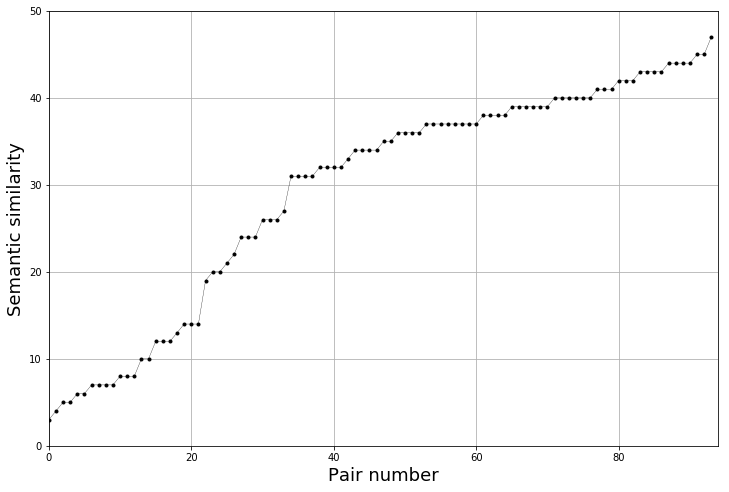

In [3]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot([x[2] for x in MENList], color='k', linestyle='-', marker='.', markersize=6, linewidth=.3 )  
plt.xlim((0,94))
plt.ylim((0,50))
plt.xlabel('Pair number', fontsize=18)
plt.ylabel('Semantic similarity', fontsize=18)
plt.grid(True)
plt.savefig('HumSim-MEN.png', dpi=300)

### b) Encoding dataset

In [4]:
Init_mem('normal', 30, MEN_names)

Begining to encode dataset...
End of encoding


### b) Measuring similarity

In [5]:
# Create list of distances for each method
HD_sim_MEN = []; McRae_sim_MEN = []; WUP_sim_MEN = []; LCH_sim_MEN = []; RES_sim_MEN = []; JCN_sim_MEN = []
# Loop over all pairs of concepts
i = 0
print "Starting..."
for pair in MENList:
    print i,
    HD_sim_MEN.append(1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N))
    McRae_sim_MEN.append( McRae_simi(pair[0:2]) )
    WUP_sim_MEN.append(similarity_fun(wn.wup_similarity, pair[0:2]))
    LCH_sim_MEN.append(similarity_fun(wn.lch_similarity, pair[0:2]))
    RES_sim_MEN.append(similarity_fun(wn.res_similarity, pair[0:2], brown_ic))
    JCN_sim_MEN.append(similarity_fun(wn.jcn_similarity, pair[0:2], brown_ic))
    i += 1
print "End"

Starting...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 End


### c) Computing correlation

In [6]:
Pear_correlations = [['HDC', pearsonr(MEN_sim, HD_sim_MEN)[0]], ['McRae', pearsonr(MEN_sim, McRae_sim_MEN)[0]],
                ['wup', pearsonr(MEN_sim, WUP_sim_MEN)[0]], ['lch', pearsonr(MEN_sim, LCH_sim_MEN)[0]],
                ['res', pearsonr(MEN_sim, RES_sim_MEN)[0]], ['jcn', pearsonr(MEN_sim, JCN_sim_MEN)[0]]]

Spear_correlations = [['HDC', spearmanr(MEN_sim, HD_sim_MEN)[0]], ['McRae', spearmanr(MEN_sim, McRae_sim_MEN)[0]],
                ['wup', spearmanr(MEN_sim, WUP_sim_MEN)[0]], ['lch', spearmanr(MEN_sim, LCH_sim_MEN)[0]],
                ['res', spearmanr(MEN_sim, RES_sim_MEN)[0]], ['jcn', spearmanr(MEN_sim, JCN_sim_MEN)[0]]]


Pear_correlations = sorted(Pear_correlations, key = lambda x : x[1], reverse = True)
Spear_correlations = sorted(Spear_correlations, key = lambda x : x[1], reverse = True)

print Pear_correlations
print Spear_correlations

[['McRae', 0.6727384420807737], ['HDC', 0.66984838213587], ['lch', 0.5844039704293345], ['res', 0.5775416063712382], ['wup', 0.5570825420221547], ['jcn', 0.3172684840266299]]
[['HDC', 0.7232952622583653], ['McRae', 0.7132252668679664], ['res', 0.5633450433165348], ['lch', 0.5626242436883293], ['wup', 0.5523130823096505], ['jcn', 0.3895479853119775]]


### d) Plotting

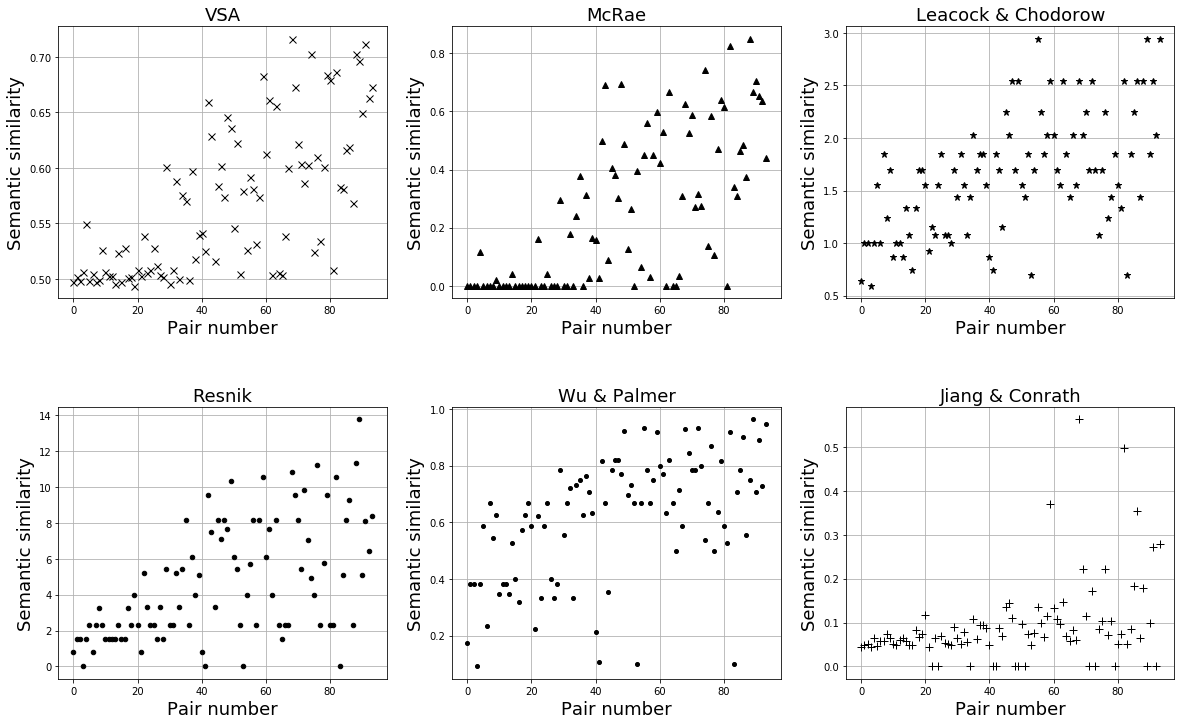

In [7]:
# Plotting
plt.rcParams["figure.figsize"] = [20,12]
f_size = 18
plt.subplots_adjust(hspace=0.4)

plt.subplot(231)
plt.plot(HD_sim_MEN, color='k', linestyle='None', marker='x', markersize=7, linewidth=1 )  
plt.title('VSA', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(232)
plt.plot(McRae_sim_MEN, color='k', linestyle='None', marker='^', markersize=6, linewidth=1 )  
plt.title('McRae', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(233)
plt.plot(LCH_sim_MEN, color='k', linestyle='None', marker='*', markersize=7, linewidth=1 )  
plt.title('Leacock & Chodorow', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(234)
plt.plot(RES_sim_MEN, color='k', linestyle='None', marker='.', markersize=9, linewidth=1 )  
plt.title('Resnik', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(235)
plt.plot(WUP_sim_MEN, color='k', linestyle='None', marker='.', markersize=8, linewidth=1 )  
plt.title('Wu & Palmer', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(236)
plt.plot(JCN_sim_MEN, color='k', linestyle='None', marker='+', markersize=8, linewidth=1 )  
plt.title('Jiang & Conrath', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.savefig('SubPlots-MEN.png') #, dpi=1000)

## Exploring some characteristics of the MEN dataset

List of names and a list of how many features are there for each concept

In [8]:
#print MEN_names
#print Dict_defs[MEN_names[0]]
L = []
for n in MEN_names:
    L.append(len(Dict_defs[n]))

print L
print max(L), min(L), sum(L)/len(L)

[13, 18, 19, 12, 15, 17, 17, 10, 16, 14, 16, 9, 7, 15, 17, 16, 13, 16, 11, 13, 12, 20, 14, 15, 13, 22, 13, 20, 13, 13, 20, 17, 17, 11, 11, 16, 9, 14, 15, 11, 13, 16, 15, 12, 16, 12, 20, 14, 11, 16, 14, 17, 11, 16, 13, 15, 12, 13, 13, 10, 14, 14, 11, 10, 12, 12, 12, 13, 21, 18, 10, 14, 12, 15, 18, 11, 14, 17, 14, 16, 19, 11, 10, 13, 15, 13, 15, 8, 14, 12, 16]
22 7 14


## Distribution of Prod_Freq values in MEN

Since we are going to weight features based on the Prod_Freq value we have to have an idea of how the prod_freq values are distributed

In [9]:
df = pd.read_excel( pathh + 'CONCS_FEATS_concstats_brm.xlsx')

# Extracting only relevant columns (from concepts in MEN)
NewDF = df[df['Concept'].isin(MEN_names)]
Newnew= NewDF[['Concept','Feature','Prod_Freq']]
#Newnew

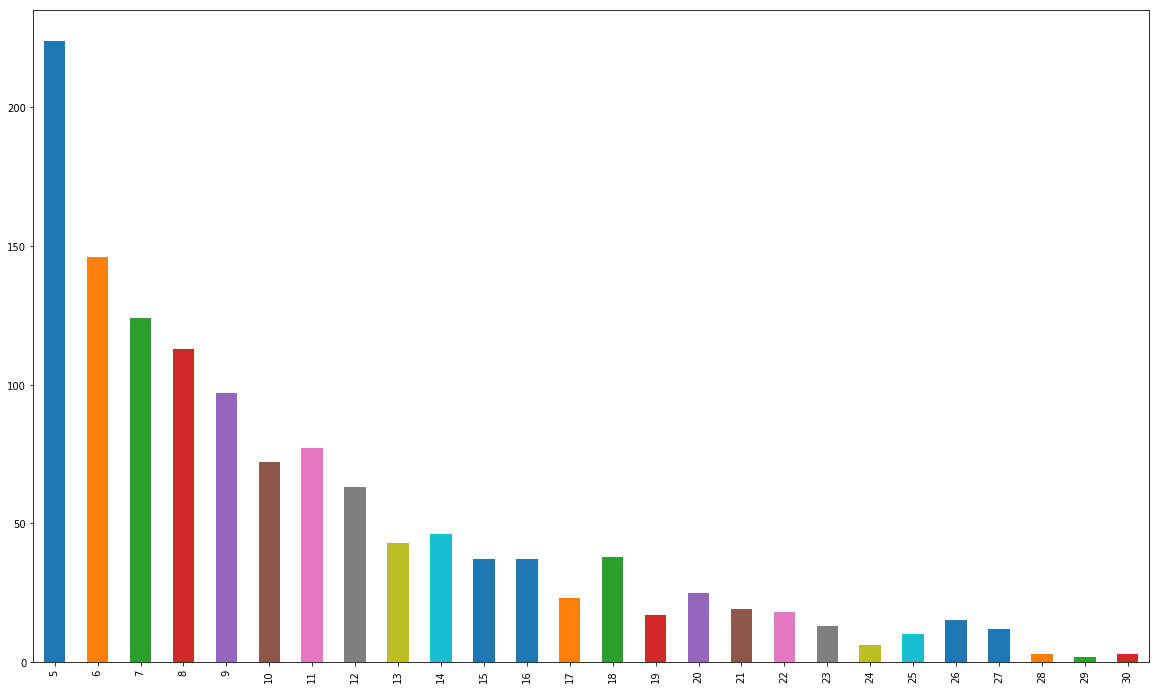

In [10]:
# Plotting distribution (x-axis is the Production Frequency value)
Freq = Newnew['Prod_Freq'].value_counts().sort_index()
#print Freq.sort_values()
Freq.plot('bar')

From the previous analysis I decided to weight each feature according to the following rules:

|Prod_Freq| Weight |
| ----- | ----- |
|28-30|5|
|21-27|4|
|15-20|3|
|10-14|2|
|5-9|1|

## Testing weighted HDC representations

Here we find the correlation between the similarity values obtained from the HDC weighted representations and the dataset.

In [18]:
%run EncodingDataset.ipynb

num_f = 30
# List of similarity values from dataset...
for mode in ['Prod_Freq']: 
    # Printing current mode
    print "\n\nMode:", mode, "  Number of features:", num_f
    # Initialize memory
    Init_mem( mode, num_f, MEN_names) 
    # Create list of distances
    HD_MEN = []
    # Loop over all pairs of concepts
    for pair in MENList:
        HD_MEN.append(1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N))
        
    pear_correlation= pearsonr(MEN_sim, HD_MEN)[0]
    spear_correlation= spearmanr(MEN_sim, HD_MEN)[0]
    print "   Pearson's correlation value: ", pear_correlation
    print "   Spearman's correlation value: ", spear_correlation



Mode: Prod_Freq   Number of features: 30
Begining to encode dataset...
End of encoding
   Pearson's correlation value:  0.6684498533360771
   Spearman's correlation value:  0.7173419574904475


## Distribution of Inter_corr_tax values in MEN

Since we are going to weight features based on the Inter_corr_str_tax value we have to have an idea of how the values are distributed

In [12]:
df = pd.read_excel( pathh + 'CONCS_FEATS_concstats_brm.xlsx')

# Extracting only relevant columns (from concepts in MEN)
NewDF = df[df['Concept'].isin(MEN_names)]
Newnew= NewDF[['Concept','Feature','Intercorr_Str_Tax']]
#Newnew

In [13]:
# Plotting distribution (x-axis is the Production Frequency value)
Newnew = Newnew.round()
Intercorr = Newnew['Intercorr_Str_Tax'].value_counts().sort_index()
#print Intercorr

In [14]:
%run EncodingDataset.ipynb

num_f = 30
# List of similarity values from dataset...
for mode in ['Intercorr_str_tax']:
    # Printing current mode
    print "\n\nMode:", mode, "  Number of features:", num_f
    # Initialize memory
    Init_mem( mode, num_f, MEN_names) 
    # Create list of distances
    HD_MEN = []
    # Loop over all pairs of concepts
    for pair in MENList:
        HD_MEN.append(1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N))
        
    pear_correlation= pearsonr(MEN_sim, HD_MEN)[0]
    spear_correlation= spearmanr(MEN_sim, HD_MEN)[0]
    print "   Pearson's correlation value: ", pear_correlation
    print "   Spearman's correlation value: ", spear_correlation



Mode: Intercorr_str_tax   Number of features: 30
Begining to encode dataset...
End of encoding
   Pearson's correlation value:  0.6678779387024252
   Spearman's correlation value:  0.6739709751722487


## No_Tax....

In [16]:
%run EncodingDataset.ipynb

num_f = 30
# List of similarity values from dataset...
for mode in ['Intercorr_str_No_tax']:
    # Printing current mode
    print "\n\nMode:", mode, "  Number of features:", num_f
    # Initialize memory
    Init_mem( mode, num_f, MEN_names) 
    # Create list of distances
    HD_MEN = []
    # Loop over all pairs of concepts
    for pair in MENList:
        HD_MEN.append(1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N))
        
    pear_correlation= pearsonr(MEN_sim, HD_MEN)[0]
    spear_correlation= spearmanr(MEN_sim, HD_MEN)[0]
    print "   Pearson's correlation value: ", pear_correlation
    print "   Spearman's correlation value: ", spear_correlation



Mode: Intercorr_str_No_tax   Number of features: 30
Begining to encode dataset...
End of encoding
   Pearson's correlation value:  0.6370988696317392
   Spearman's correlation value:  0.6840519385014343


## Combining methods...

In [15]:
%run EncodingDataset.ipynb

num_f = 30
mode = 'Intercorr_PF'

for i in range(5):
    # Printing current mode
    print "\n\n",i
    # Initialize memory
    Init_mem( mode, num_f, MEN_names) 
    # Create list of distances
    HD_MEN = []
    # Loop over all pairs of concepts
    for pair in MENList:
        HD_MEN.append(1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N))
        
    pear_correlation= pearsonr(MEN_sim, HD_MEN)[0]
    spear_correlation= spearmanr(MEN_sim, HD_MEN)[0]
    print "   Pearson's correlation value: ", pear_correlation
    print "   Spearman's correlation value: ", spear_correlation



0
Begining to encode dataset...
End of encoding
   Pearson's correlation value:  0.6781103253879818
   Spearman's correlation value:  0.7331969692409934


1
Begining to encode dataset...
End of encoding
   Pearson's correlation value:  0.6682028955044091
   Spearman's correlation value:  0.6840928574082048


2
Begining to encode dataset...
End of encoding
   Pearson's correlation value:  0.6770425536894877
   Spearman's correlation value:  0.7232420272864664


3
Begining to encode dataset...
End of encoding
   Pearson's correlation value:  0.6684755209525504
   Spearman's correlation value:  0.7143661100046387


4
Begining to encode dataset...
End of encoding
   Pearson's correlation value:  0.662134333212473
   Spearman's correlation value:  0.6590989342218162


### Combining with Intercorr_No_Tax... 

In [17]:
%run EncodingDataset.ipynb

num_f = 30
mode = 'Intercorr_NoT_PF'

for i in range(5):
    # Printing current mode
    print "\n\n",i
    # Initialize memory
    Init_mem( mode, num_f, MEN_names) 
    # Create list of distances
    HD_MEN = []
    # Loop over all pairs of concepts
    for pair in MENList:
        HD_MEN.append(1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N))
        
    pear_correlation= pearsonr(MEN_sim, HD_MEN)[0]
    spear_correlation= spearmanr(MEN_sim, HD_MEN)[0]
    print "   Pearson's correlation value: ", pear_correlation
    print "   Spearman's correlation value: ", spear_correlation



0
Begining to encode dataset...
End of encoding
   Pearson's correlation value:  0.6572807232088086
   Spearman's correlation value:  0.7155851758829317


1
Begining to encode dataset...
End of encoding
   Pearson's correlation value:  0.6583304246983857
   Spearman's correlation value:  0.6808183670597161


2
Begining to encode dataset...
End of encoding
   Pearson's correlation value:  0.6659422212263946
   Spearman's correlation value:  0.7278686900889597


3
Begining to encode dataset...
End of encoding
   Pearson's correlation value:  0.6625137099982632
   Spearman's correlation value:  0.7105384387080134


4
Begining to encode dataset...
End of encoding
   Pearson's correlation value:  0.6500814072660884
   Spearman's correlation value:  0.6762032183084711
